In [54]:
# task 1: list all the files in directory
# task 2: process all the files sequentially
# task 3: extract text from each file
# task 4: tokenize
# task 5: iterate over list of words and count unigrams,bigrams,trigrams and quadgrams 
# task 6: return a dictionary of unigrams,bigrams,trigrams and quadgrams

In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import PyPDF2
from nltk.tokenize import word_tokenize

In [2]:
from pypdf import PdfReader

def extract_text_from_pdf(pdf_path):
    text = ""
    with open(pdf_path, "rb") as f:
        reader = PdfReader(f)
        for page in reader.pages:
            text += page.extract_text() or ""
    return text


In [3]:
def extractNgrams(my_text):

    tokens = word_tokenize(my_text)

    unigrams_dict = {}
    bigrams_dict = {}
    trigrams_dict = {}
    quadgrams_dict = {}

    def cleanText(tokenList):
        goodTokens = [token.lower() for token in tokenList if token.isalnum()]
        return goodTokens

    tokens = cleanText(tokens)
    if len(tokens) < 4:
        return [[{}, {}, {}, {}]]
    print(len(tokens))
    for i in range(len(tokens)-3):
        token_1 = tokens[i]
        token_2 = tokens[i+1]
        token_3 = tokens[i+2]
        token_4 = tokens[i+3]

        unigram = token_1 
        bigram = token_1 + " " + token_2
        trigram = bigram + " " + token_3
        quadgram = trigram + " " + token_4

        if  unigram not in unigrams_dict:
            unigrams_dict[unigram] = 0
        unigrams_dict[unigram] += 1

        if bigram not in bigrams_dict:
            bigrams_dict[bigram] = 0
        bigrams_dict[bigram] += 1

        if trigram not in trigrams_dict:
            trigrams_dict[trigram] = 0
        trigrams_dict[trigram] += 1

        if quadgram not in quadgrams_dict:
            quadgrams_dict[quadgram] = 0
        quadgrams_dict[quadgram] += 1


    # ADDING REMAINING UNIGRAMS
    for token in tokens[len(tokens)-3:]:
        unigrams_dict[token] = unigrams_dict.get(token, 0) + 1

    # ADDING REMAING BIGRAMS
    for i in range(len(tokens)-3, len(tokens)-1):
        token_1 = tokens[i]
        token_2 = tokens[i+1]
        bigram = token_1 + " " + token_2
        if bigram not in bigrams_dict:
            bigrams_dict[bigram] = 0
        bigrams_dict[bigram] += 1

    token_1 = tokens[len(tokens)-3]
    token_2 = tokens[len(tokens)-2]
    token_3 = tokens[len(tokens)-1]
    trigram = token_1 + " " + token_2 + " " + token_3
    if trigram not in trigrams_dict:
        trigrams_dict[trigram] = 0
    trigrams_dict[trigram] += 1
    
    return [[unigrams_dict, bigrams_dict, trigrams_dict, quadgrams_dict]]


In [4]:
def zscore(data):
    mean = data.mean()
    std = data.std()
    return (data - mean) / std if std else 0

In [5]:
def robust_zscore(data):
    median = data.median()
    iqrange = data.quantile(0.75) - data.quantile(0.25)
    return (data - median) / iqrange if iqrange else 0

In [6]:
def calculateMahalanobis(df):
    numeric_df = df[["frequency", "num_pdfs"]]

    mean_vec = np.mean(numeric_df, axis=0)
    cov_matrix = np.cov(numeric_df, rowvar=False)
    inv_cov_matrix = np.linalg.inv(cov_matrix)

    def mahalanobis(x, mean, inv_cov):
        diff = x - mean
        return np.sqrt(diff.T @ inv_cov @ diff)

    df["mahalanobis_distance"] = numeric_df.apply(
        lambda row: mahalanobis(row.values, mean_vec, inv_cov_matrix), axis=1
    )
    return df["mahalanobis_distance"]

In [7]:

def MAD(df):
    data = np.array(df["frequency"])
    median = np.median(data)
    mad = np.median(np.abs(data - median))
    z = (data - median) / mad
    return mad

In [8]:
pdf_folder = "batchspdf/"
pdf_files = glob.glob(os.path.join(pdf_folder, "*.pdf"))

pdf_texts = []

for pdf in pdf_files:
    text = extract_text_from_pdf(pdf)
    pdf_texts.append(text)

Multiple definitions in dictionary at byte 0x33cd for key /ExtGState
Multiple definitions in dictionary at byte 0x71c8 for key /ExtGState
Multiple definitions in dictionary at byte 0x9d63 for key /ExtGState
Multiple definitions in dictionary at byte 0xd5c3 for key /ExtGState
Multiple definitions in dictionary at byte 0x10333 for key /ExtGState
Multiple definitions in dictionary at byte 0x130e3 for key /ExtGState
Multiple definitions in dictionary at byte 0x15f08 for key /ExtGState
Multiple definitions in dictionary at byte 0x18d65 for key /ExtGState
Multiple definitions in dictionary at byte 0x1bbd5 for key /ExtGState
Multiple definitions in dictionary at byte 0x27479 for key /ExtGState
Multiple definitions in dictionary at byte 0x2bd7a for key /ExtGState
Multiple definitions in dictionary at byte 0x2ead0 for key /ExtGState
Multiple definitions in dictionary at byte 0x3158f for key /ExtGState
Multiple definitions in dictionary at byte 0x340ca for key /ExtGState
Multiple definitions in 

In [9]:
ngrams_list = []
for pdf_text in pdf_texts:
    ngrams = extractNgrams(pdf_text)
    ngrams_list.extend(ngrams)

1020
2158
6199
897
5251
4624
7677
1672
827
9559
5448
1481
1382
489
1968
4402
9880
271
1525
505
4083
10978
1311
813
1260
5426
991
4088
837
3811
1723
15258
17690
10722
5425
1978
1768
3342
3602
2054
1564
2298
2610
3920
2779
1470
4385
1292
4931
8934
544
996
3077
2287
8617
4931
747
5140
6083
16451
806
839
779
1290
1066
505
2448
530
5206
1280
1122
3306
423
2426
1589
2367
4733
1440
10613
7016
2855
2443
1291
10589
3965
1401
2133
1032
438
2506
24681
957
5850
1144
1140
4935
1039
713
3297
2089
380
987
2078
7379
4889
5568
842
3884
1470
3673
6820
9558


In [11]:
# creating dataframe of unigrams with there frequency and no. of pdfs it occured in
unigrams_df = pd.DataFrame(columns=["unigram", "frequency", "num_pdfs"])
unigram_counts = {}
for ngram in ngrams_list:
    unigrams = ngram[0]
    for unigram, count in unigrams.items():
        if unigram not in unigram_counts:
            unigram_counts[unigram] = [0, 0]  # [total frequency, number of PDFs]
        unigram_counts[unigram][0] += count
        unigram_counts[unigram][1] += 1
unigrams_df = pd.DataFrame.from_dict(unigram_counts, orient="index", columns=["frequency", "num_pdfs"])
unigrams_df["unigram"] = unigrams_df.index
unigrams_df.reset_index(drop=True, inplace=True)
unigrams_df = unigrams_df[["unigram", "frequency", "num_pdfs"]]
unigrams_df = unigrams_df.sort_values(by="frequency", ascending=False).reset_index(drop=True)

In [12]:
#creating dataframe of bigrams with there frequency and no. of pdfs it occured in
bigrams_df = pd.DataFrame(columns=["bigram", "frequency", "num_pdfs"])
bigram_counts = {}
for ngram in ngrams_list:
    bigrams = ngram[1]
    for bigram, count in bigrams.items():
        if bigram not in bigram_counts:
            bigram_counts[bigram] = [0, 0]  # [total frequency, number of PDFs]
        bigram_counts[bigram][0] += count
        bigram_counts[bigram][1] += 1
bigrams_df = pd.DataFrame.from_dict(bigram_counts, orient="index", columns=["frequency", "num_pdfs"])
bigrams_df["bigram"] = bigrams_df.index
bigrams_df.reset_index(drop=True, inplace=True)
bigrams_df = bigrams_df[["bigram", "frequency", "num_pdfs"]]
bigrams_df = bigrams_df.sort_values(by="frequency", ascending=False).reset_index(drop=True)

In [13]:
# creating dataframe of trigrams with there frequency and no. of pdfs it occured in
trigrams_df = pd.DataFrame(columns=["trigram", "frequency", "num_pdfs"])
trigram_counts = {}
for ngram in ngrams_list:
    trigrams = ngram[2]
    for trigram, count in trigrams.items():
        if trigram not in trigram_counts:
            trigram_counts[trigram] = [0, 0]  # [total frequency, number of PDFs]
        trigram_counts[trigram][0] += count
        trigram_counts[trigram][1] += 1
trigrams_df = pd.DataFrame.from_dict(trigram_counts, orient="index", columns=["frequency", "num_pdfs"])
trigrams_df["trigram"] = trigrams_df.index
trigrams_df.reset_index(drop=True, inplace=True)
trigrams_df = trigrams_df[["trigram", "frequency", "num_pdfs"]]
trigrams_df = trigrams_df.sort_values(by="frequency", ascending=False).reset_index(drop=True)   

In [14]:
# creating dataframe of quadgrams with there frequency and no. of pdfs it occured in
quadgrams_df = pd.DataFrame(columns=["quadgram", "frequency", "num_pdfs"])
quadgram_counts = {}
for ngram in ngrams_list:    
    quadgrams = ngram[3]
    for quadgram, count in quadgrams.items():
        if quadgram not in quadgram_counts:
            quadgram_counts[quadgram] = [0, 0]  # [total frequency, number of PDFs]
        quadgram_counts[quadgram][0] += count
        quadgram_counts[quadgram][1] += 1
quadgrams_df = pd.DataFrame.from_dict(quadgram_counts, orient="index", columns=["frequency", "num_pdfs"])
quadgrams_df["quadgram"] = quadgrams_df.index
quadgrams_df.reset_index(drop=True, inplace=True)
quadgrams_df = quadgrams_df[["quadgram", "frequency", "num_pdfs"]]
quadgrams_df = quadgrams_df.sort_values(by="frequency", ascending=False).reset_index(drop=True) 

$$
Unigrams  Analysis
$$

In [15]:
unigrams_df["z_score"] = zscore(unigrams_df["frequency"])
unigrams_df["robust_z_score"] = robust_zscore(unigrams_df["frequency"])
unigrams_df["mahalanobis_distance"] = calculateMahalanobis(unigrams_df)

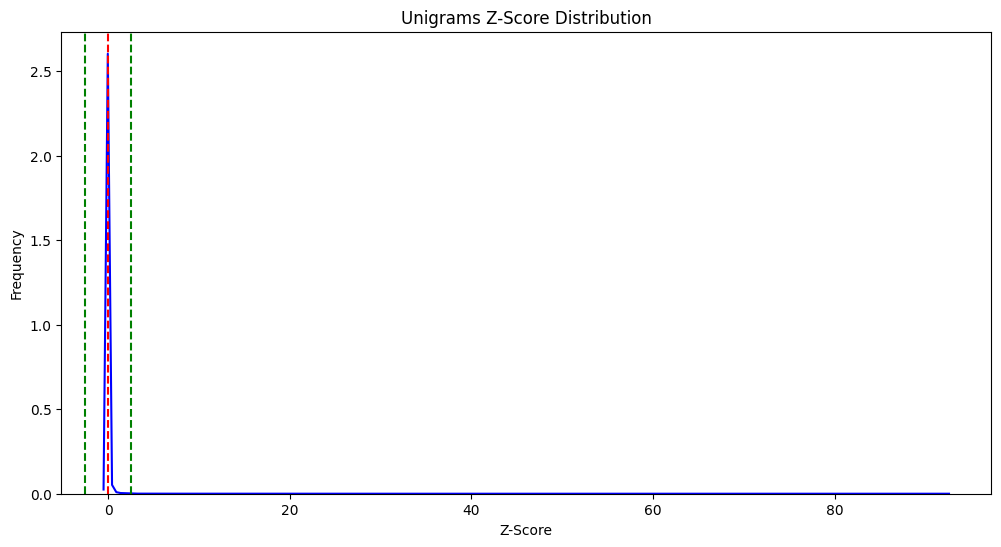

In [17]:
unigrams_std_z_score = unigrams_df["z_score"].std()
left_threshold_z_score = -2.5 
right_threshold_z_score = 2.5 

plt.figure(figsize=(12, 6))
sns.kdeplot(unigrams_df["z_score"], color="blue")
plt.axvline(x=0, color="r", linestyle="--")
plt.axvline(x=right_threshold_z_score, color="g", linestyle="--")
plt.axvline(x=left_threshold_z_score, color="g", linestyle="--")
plt.title("Unigrams Z-Score Distribution")
plt.xlabel("Z-Score")
plt.ylabel("Frequency")
plt.show()

unigrams_outliers_zscore = unigrams_df[
    (unigrams_df["z_score"] > right_threshold_z_score)
    | (unigrams_df["z_score"] < left_threshold_z_score)
]
unigrams_outliers_zscore["unigram"].to_csv("unigrams_outliers_zscore.csv", index=False)


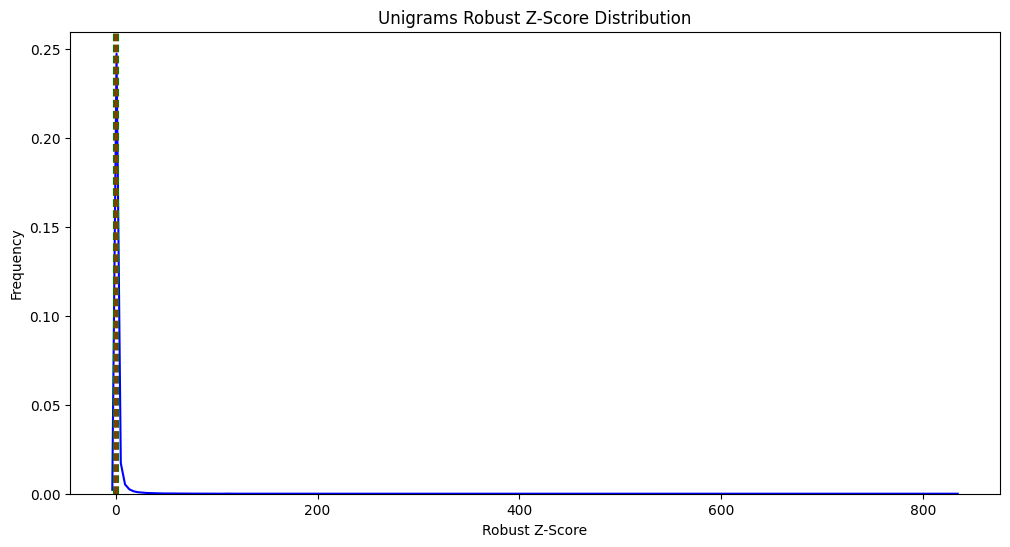

In [70]:

robust_iqr = unigrams_df["robust_z_score"].quantile(0.75) - unigrams_df["robust_z_score"].quantile(0.25)
right_threshold = unigrams_df["robust_z_score"].quantile(0.75) + 1.5 * robust_iqr
left_threshold = unigrams_df["robust_z_score"].quantile(0.25) - 1.5 * robust_iqr

plt.figure(figsize=(12, 6))
sns.kdeplot(unigrams_df["robust_z_score"], color="blue")
plt.axvline(x=0, color="r", linestyle="--")
plt.axvline(x=right_threshold, color="g", linestyle="--")
plt.axvline(x=left_threshold, color="g", linestyle="--")
plt.title("Unigrams Robust Z-Score Distribution")
plt.xlabel("Robust Z-Score")
plt.ylabel("Frequency")
plt.show()

unigrams_outliers_robustzscore = unigrams_df[
    (unigrams_df["robust_z_score"] > right_threshold)
    | (unigrams_df["robust_z_score"] < left_threshold)
]
unigrams_outliers_robustzscore["unigram"].to_csv("unigrams_outliers_robustzscore.csv", index=False)


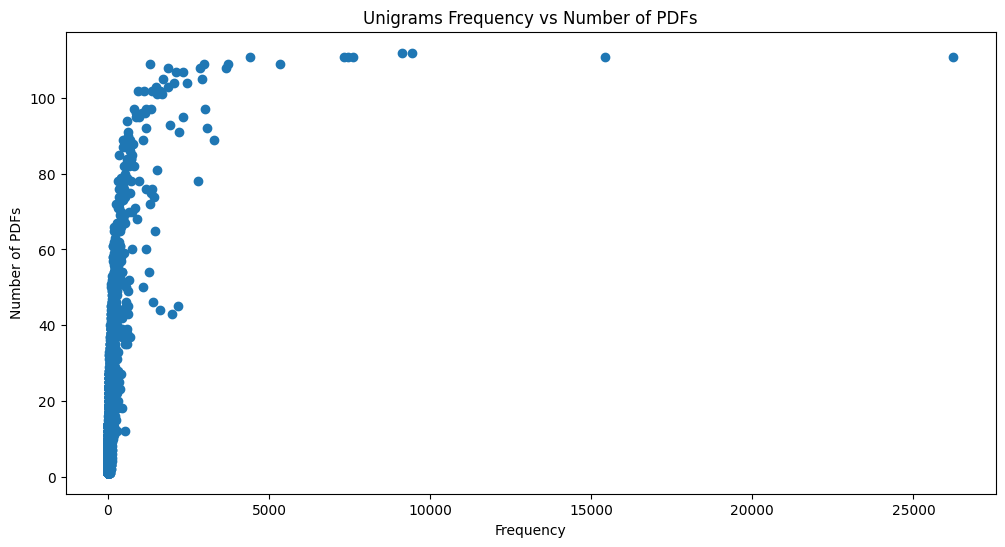

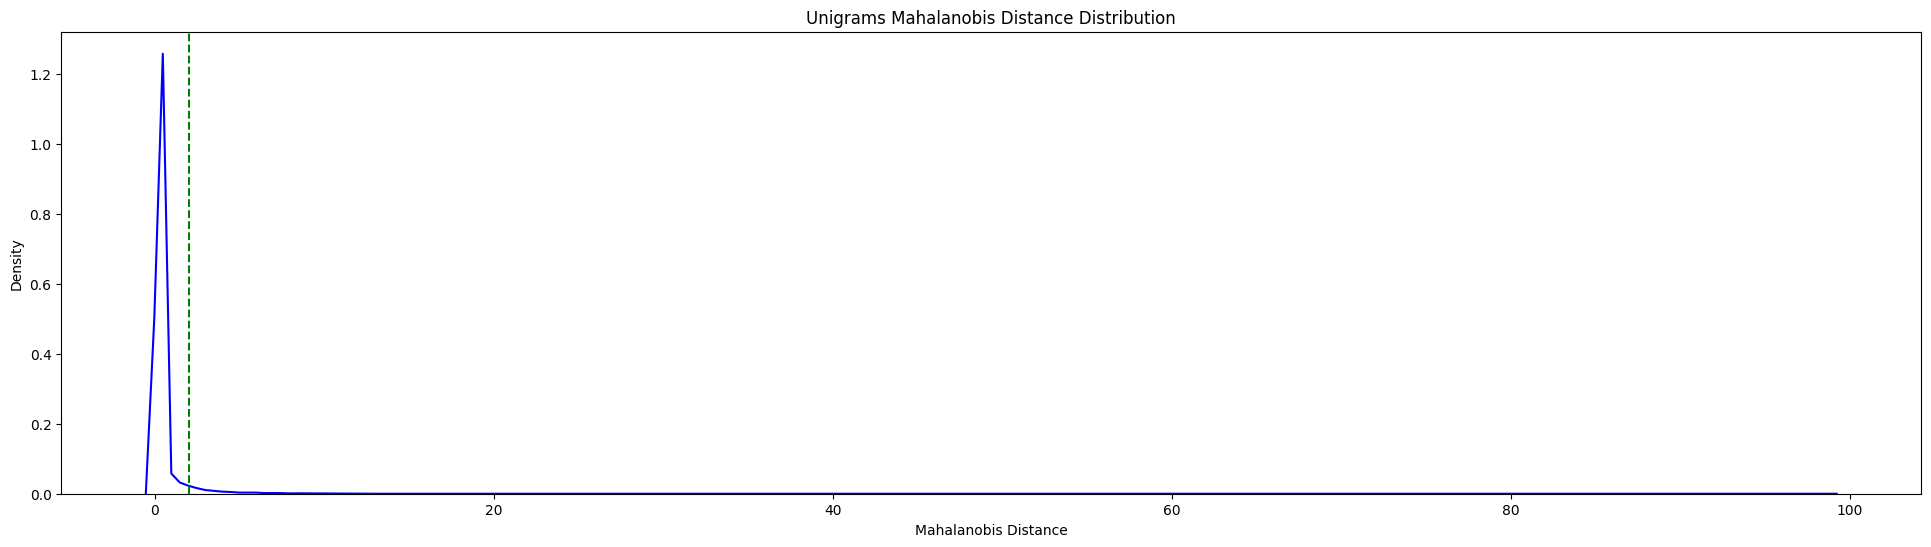

In [18]:

plt.figure(figsize=(12, 6))
plt.scatter(unigrams_df["frequency"], unigrams_df["num_pdfs"])
plt.title("Unigrams Frequency vs Number of PDFs")
plt.xlabel("Frequency")
plt.ylabel("Number of PDFs")
plt.show()
plt.figure(figsize=(24, 6))
sns.kdeplot(unigrams_df["mahalanobis_distance"], color="blue")
plt.axvline(x=2.0, color="g", linestyle="--")
plt.title("Unigrams Mahalanobis Distance Distribution")
plt.xlabel("Mahalanobis Distance")
plt.ylabel("Density")
plt.show()

unigrams_outliers_mahalanobis = unigrams_df[unigrams_df["mahalanobis_distance"] > 2.0]
unigrams_outliers_mahalanobis["unigram"].to_csv("unigrams_outliers_mahalanobis.csv", index=False)

$$ Bigrams Analysis $$

In [19]:
bigrams_df["z_score"] = zscore(bigrams_df["frequency"])
bigrams_df["robust_z_score"] = robust_zscore(bigrams_df["frequency"])
bigrams_df["mahalanobis_distance"] = calculateMahalanobis(bigrams_df)

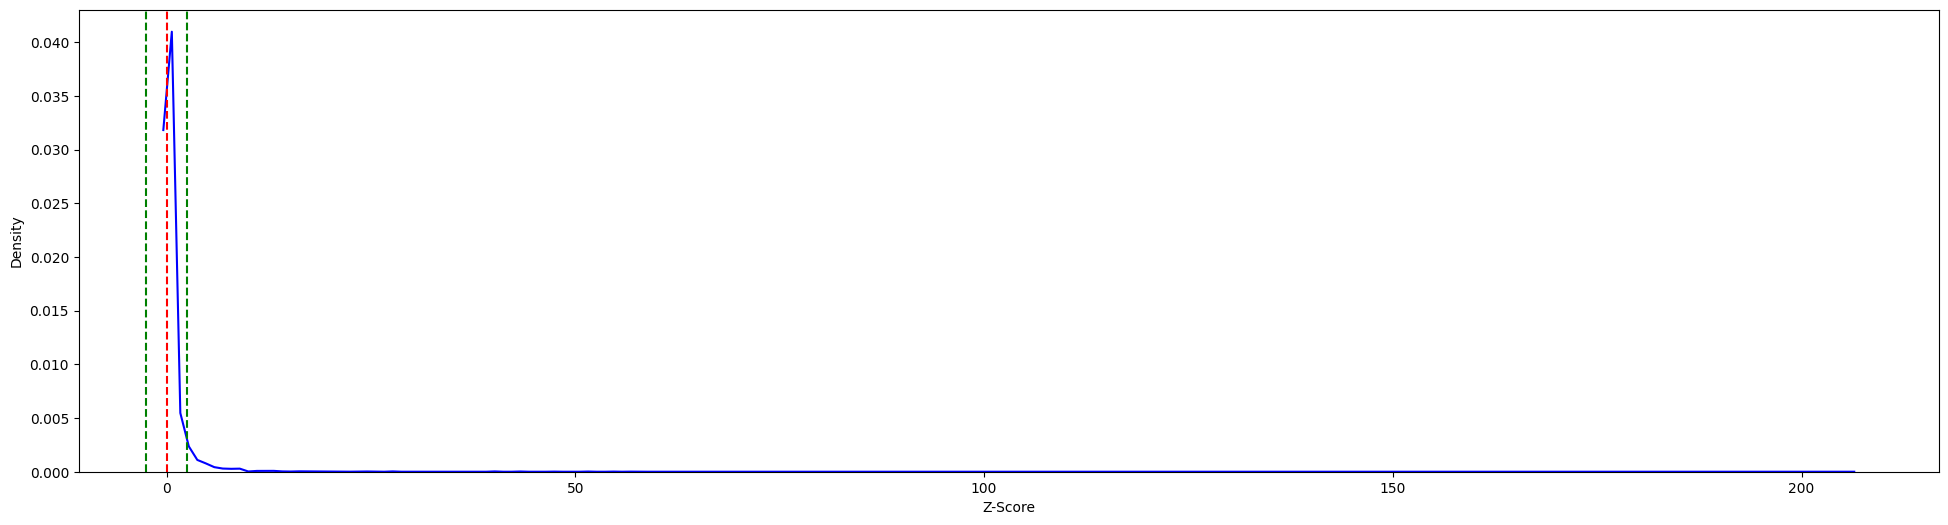

In [20]:

plt.figure(figsize=(24, 6))
sns.kdeplot(bigrams_df["z_score"], color="blue")
plt.axvline(x=0, color="r", linestyle="--")
plt.axvline(x=2.5, color="g", linestyle="--")
plt.axvline(x=-2.5, color="g", linestyle="--")
plt.xlabel("Z-Score")
plt.ylabel("Density")
plt.show()

bigrams_outlier_zscore = bigrams_df[
    (bigrams_df["z_score"] > 2.5) | (bigrams_df["z_score"] < -2.5)
]
bigrams_outlier_zscore["bigram"].to_csv("bigrams_outlier_zscore.csv", index=False)


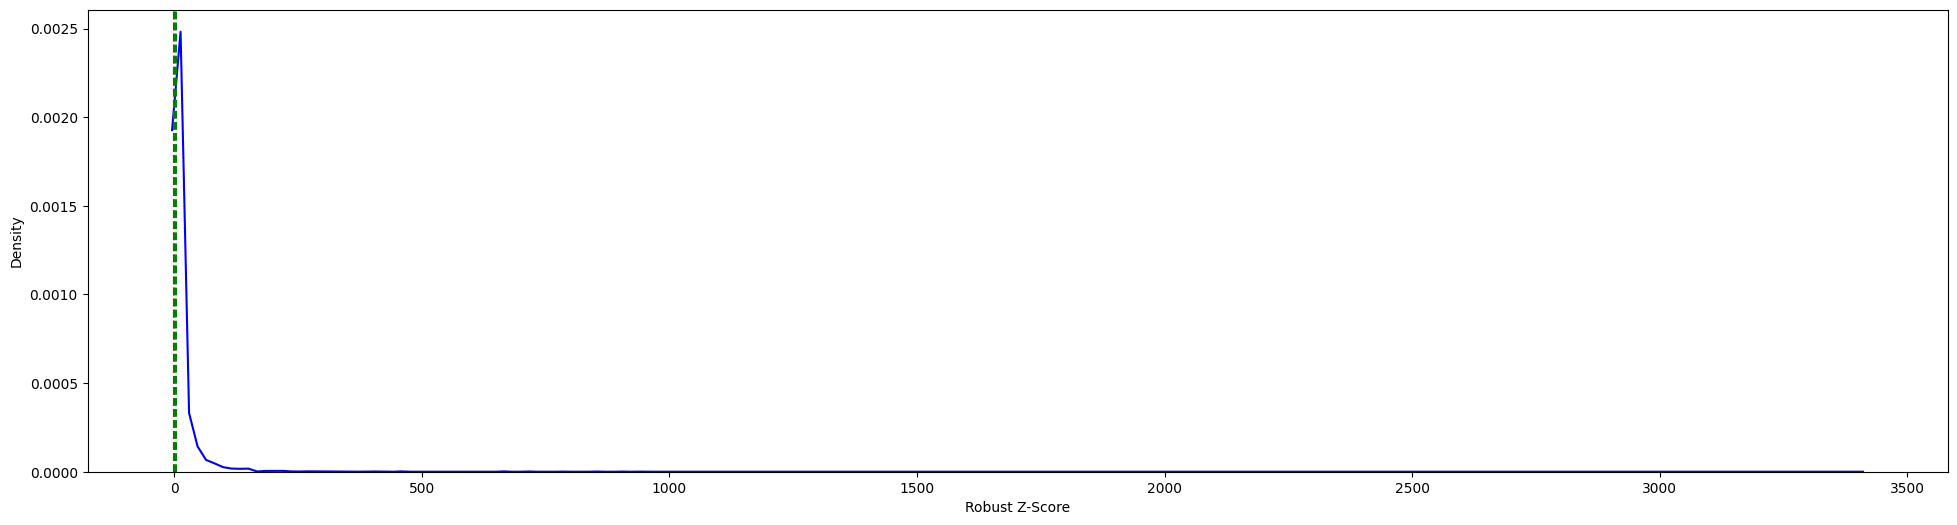

In [21]:

iqr = bigrams_df["robust_z_score"].quantile(0.75) - bigrams_df["robust_z_score"].quantile(0.25)
a = bigrams_df["robust_z_score"].quantile(0.75) + 1.5 * iqr
b = bigrams_df["robust_z_score"].quantile(0.25) - 1.5 * iqr

plt.figure(figsize=(24, 6))
sns.kdeplot(bigrams_df["robust_z_score"], color="blue")
plt.axvline(x=0, color="r", linestyle="--")
plt.axvline(x=a, color="g", linestyle="--")
plt.axvline(x=b, color="g", linestyle="--")
plt.xlabel("Robust Z-Score")
plt.ylabel("Density")
plt.show()

bigrams_outlier_robust_zscore = bigrams_df[
    (bigrams_df["robust_z_score"] < b) | (bigrams_df["robust_z_score"] > a)
]
bigrams_outlier_robust_zscore["bigram"].to_csv("bigrams_outlier_robust_zscore.csv", index=False)


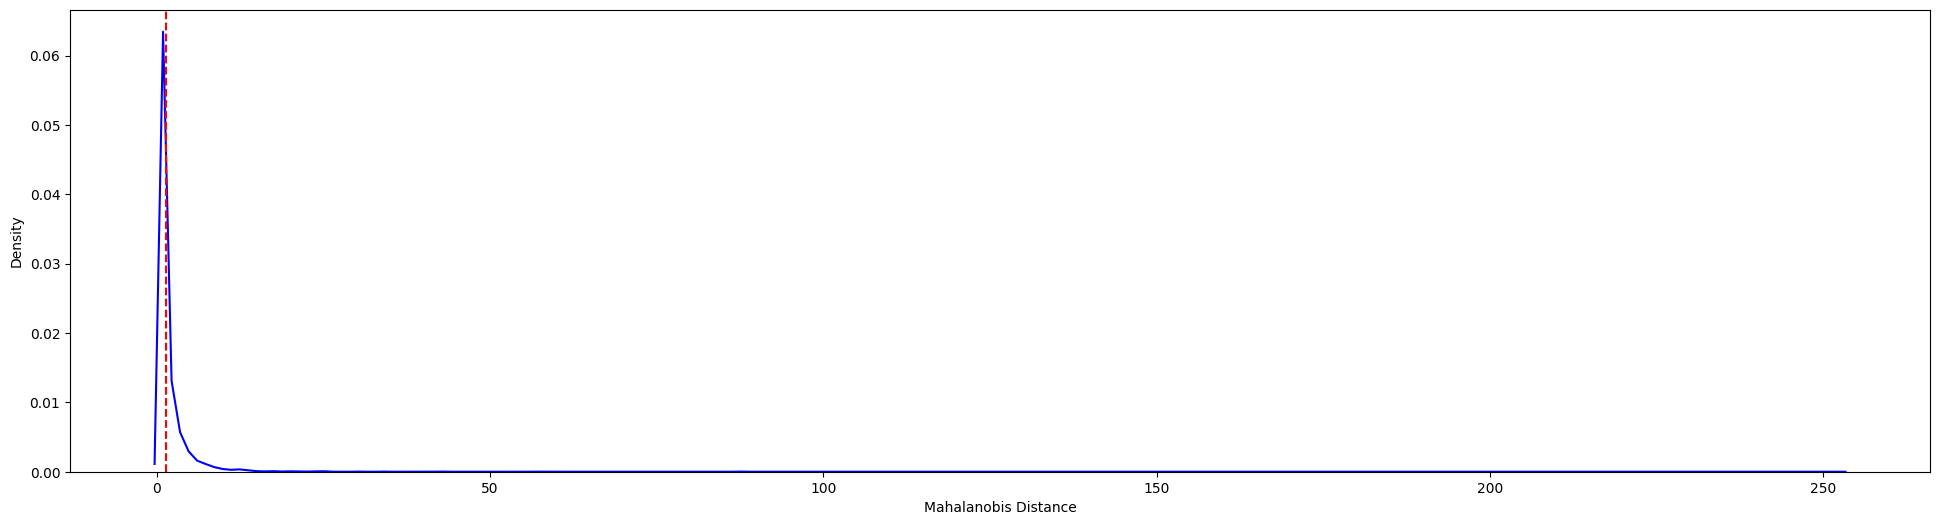

In [22]:

plt.figure(figsize=(24, 6))
sns.kdeplot(bigrams_df["mahalanobis_distance"], color="blue")
plt.axvline(x=1.4, color="r", linestyle="--")
plt.xlabel("Mahalanobis Distance")
plt.ylabel("Density")
plt.show()

bigrams_outlier_mahalanobis = bigrams_df[bigrams_df["mahalanobis_distance"] > 1.4]
bigrams_outlier_mahalanobis["bigram"].to_csv("bigrams_outlier_mahalanobis.csv", index=False)


$$ Trigrams Analysis $$


In [23]:
trigrams_df["z_score"] = zscore(trigrams_df["frequency"])
trigrams_df["robust_z_score"] = robust_zscore(trigrams_df["frequency"])
trigrams_df["mahalanobis_distance"] = calculateMahalanobis(trigrams_df)

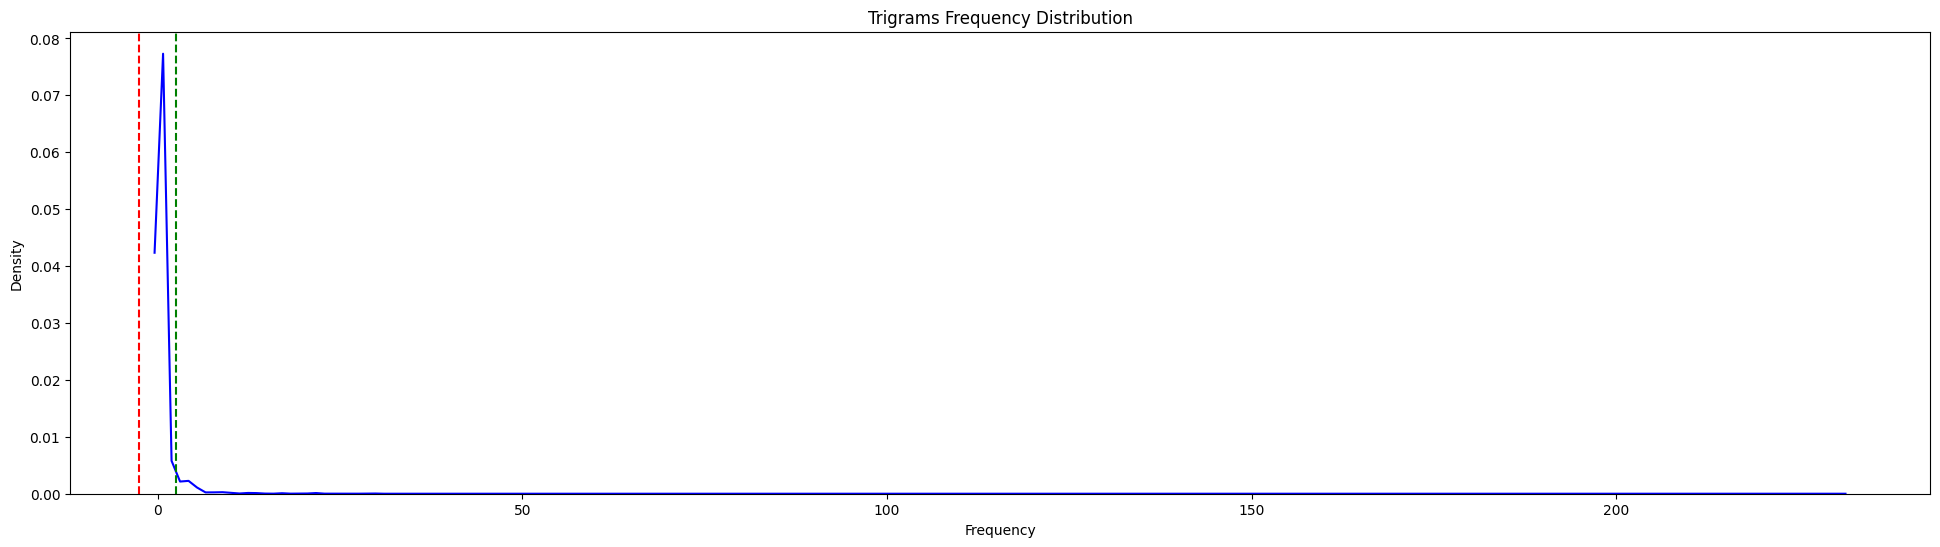

In [24]:

plt.figure(figsize=(24, 6))
sns.kdeplot(trigrams_df["z_score"], color="blue")
plt.axvline(x= -2.5, color="r", linestyle="--")
plt.axvline(x= 2.5, color="g", linestyle="--")
plt.xlabel("Frequency")
plt.ylabel("Density")
plt.title("Trigrams Frequency Distribution")
plt.show()

trigrams_outlier_zscore = trigrams_df[
    (trigrams_df["z_score"] > 2.5) | (trigrams_df["z_score"] < -2.5)
]
trigrams_outlier_zscore["trigram"].to_csv("trigrams_outlier_zscore.csv", index=False)


C:\Users\ACER\AppData\Local\Temp\ipykernel_18456\104757518.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(trigrams_df["robust_z_score"], color="blue")


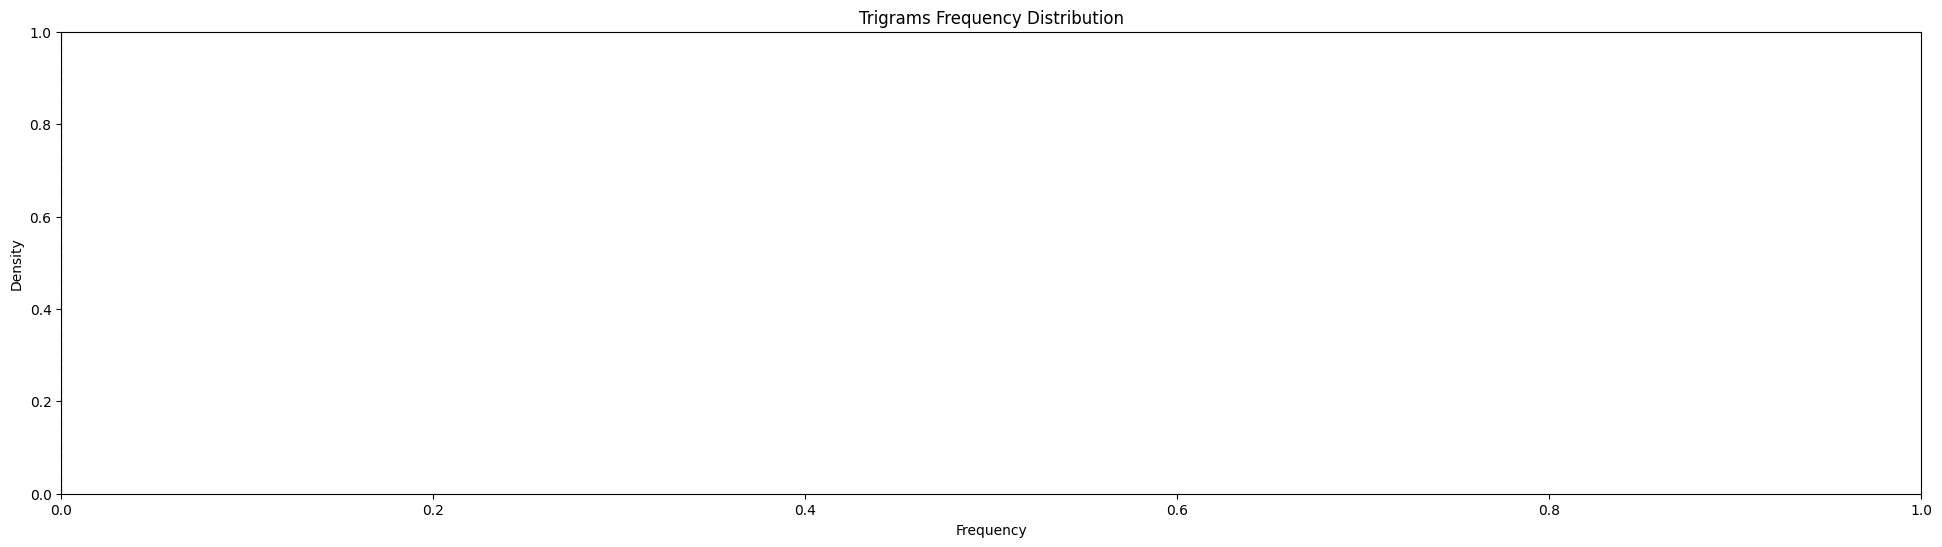

In [78]:

left_threshold = trigrams_df["robust_z_score"].quantile(0.25) - 1.5 * (trigrams_df["robust_z_score"].quantile(0.75) - trigrams_df["robust_z_score"].quantile(0.25))
right_threshold = trigrams_df["robust_z_score"].quantile(0.75) + 1.5 * (trigrams_df["robust_z_score"].quantile(0.75) - trigrams_df["robust_z_score"].quantile(0.25))
plt.figure(figsize=(24, 6))
sns.kdeplot(trigrams_df["robust_z_score"], color="blue")
plt.axvline(x= left_threshold, color="r", linestyle="--")
plt.axvline(x= right_threshold, color="g", linestyle="--")
plt.xlabel("Frequency")
plt.ylabel("Density")
plt.title("Trigrams Frequency Distribution")
plt.show()

trigrams_outlier_robust_zscore = trigrams_df[
    (trigrams_df["robust_z_score"] > right_threshold) | (trigrams_df["robust_z_score"] < left_threshold)
]
trigrams_outlier_robust_zscore["trigram"].to_csv("trigrams_outlier_robust_zscore.csv", index=False)


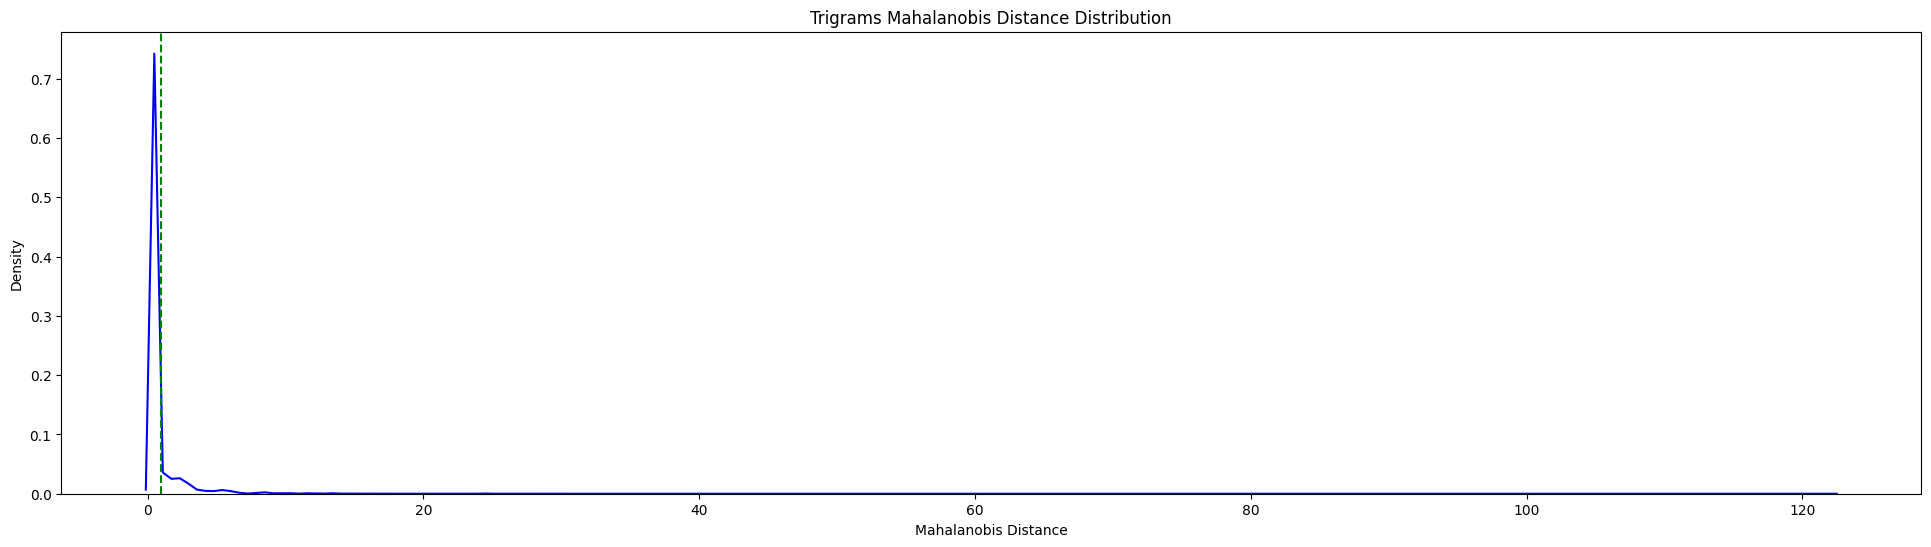

In [79]:
plt.figure(figsize=(24, 6))
sns.kdeplot(trigrams_df["mahalanobis_distance"], color="blue")
plt.axvline(x=1.0, color="g", linestyle="--")
plt.xlabel("Mahalanobis Distance")
plt.ylabel("Density")
plt.title("Trigrams Mahalanobis Distance Distribution")
plt.show()

trigrams_outlier_mahalanobis = trigrams_df[trigrams_df["mahalanobis_distance"] > 1.0]
trigrams_outlier_mahalanobis["trigram"].to_csv("trigrams_outlier_mahalanobis.csv", index=False)


$$ QuadgramsAnalysis $$

In [80]:
quadgrams_df["z_score"] = zscore(quadgrams_df["frequency"])
quadgrams_df["robust_z_score"] = robust_zscore(quadgrams_df["frequency"])
quadgrams_df["mahalanobis_distance"] = calculateMahalanobis(quadgrams_df)


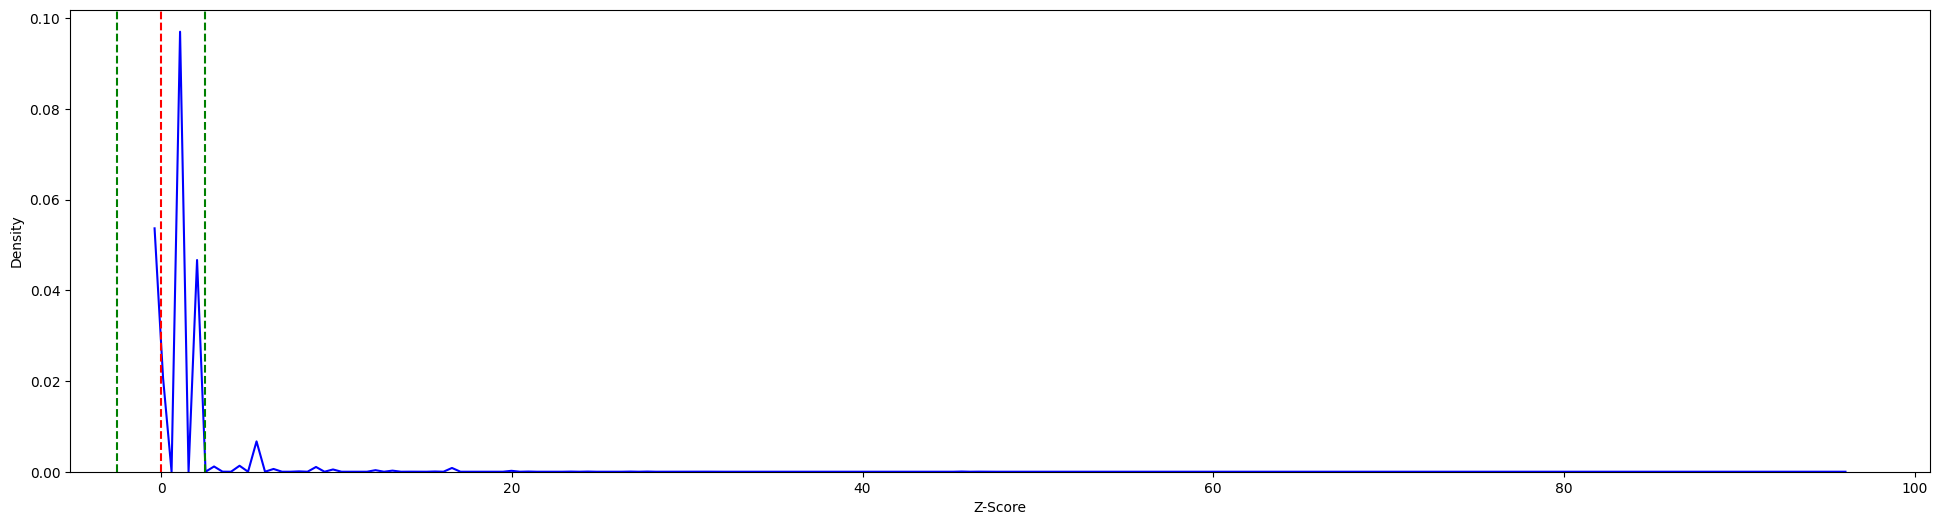

In [81]:
plt.figure(figsize=(24, 6))
sns.kdeplot(quadgrams_df["z_score"], color="blue")
plt.axvline(x=0, color="r", linestyle="--")
plt.axvline(x=2.5, color="g", linestyle="--")
plt.axvline(x=-2.5, color="g", linestyle="--")
plt.xlabel("Z-Score")
plt.ylabel("Density")
plt.show()

quadgrams_outlier_zscore = quadgrams_df[
    (quadgrams_df["z_score"] > 2.5) | (quadgrams_df["z_score"] < -2.5)
]
quadgrams_outlier_zscore["quadgram"].to_csv("quadgrams_outlier_zscore.csv", index=False)

C:\Users\ACER\AppData\Local\Temp\ipykernel_18456\188200881.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(quadgrams_df["robust_z_score"], color="blue")


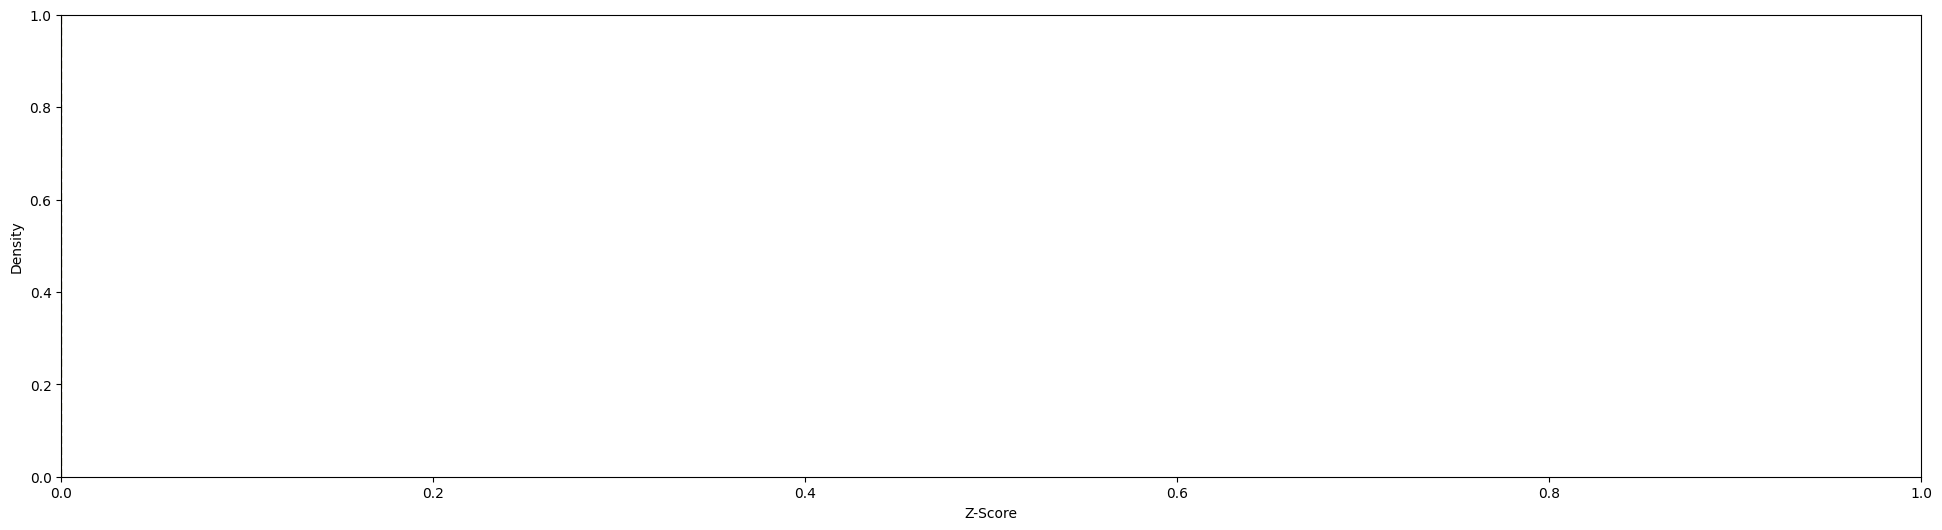

In [82]:
left_threshold = quadgrams_df["robust_z_score"].quantile(0.25) - 1.5 * (quadgrams_df["robust_z_score"].quantile(0.75) - quadgrams_df["robust_z_score"].quantile(0.25))
right_threshold = quadgrams_df["robust_z_score"].quantile(0.75) + 1.5 * (quadgrams_df["robust_z_score"].quantile(0.75) - quadgrams_df["robust_z_score"].quantile(0.25))
plt.figure(figsize=(24, 6))
sns.kdeplot(quadgrams_df["robust_z_score"], color="blue")
plt.axvline(x=0, color="r", linestyle="--")
plt.axvline(x = left_threshold, color="g", linestyle="--")
plt.axvline(x=right_threshold, color="g", linestyle="--")
plt.xlabel("Z-Score")
plt.ylabel("Density")
plt.show()

quadgrams_outlier_robust_zscore = quadgrams_df[
    (quadgrams_df["robust_z_score"] > right_threshold) | (quadgrams_df["robust_z_score"] < left_threshold)
]
quadgrams_outlier_robust_zscore["quadgram"].to_csv("quadgrams_outlier_robust_zscore.csv", index=False)


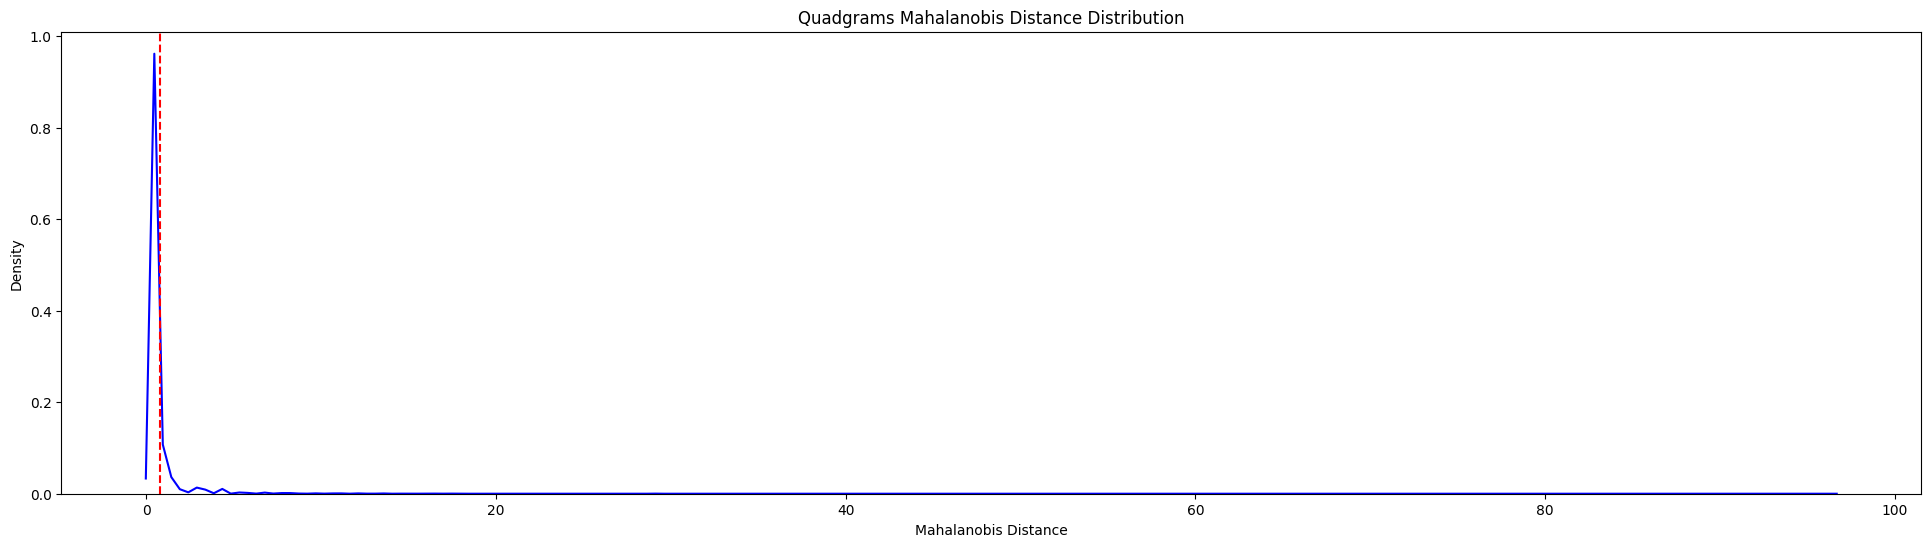

In [83]:
plt.figure(figsize=(24, 6))
sns.kdeplot(quadgrams_df["mahalanobis_distance"], color="blue")
plt.axvline(x=0.8, color="r", linestyle="--")
plt.xlabel("Mahalanobis Distance")
plt.ylabel("Density")
plt.title("Quadgrams Mahalanobis Distance Distribution")
plt.show()

quadgrams_outlier_mahalanobis = quadgrams_df[
    quadgrams_df["mahalanobis_distance"] > 0.8
]
quadgrams_outlier_mahalanobis["quadgram"].to_csv("quadgrams_outlier_mahalanobis.csv", index=False)

